In [1]:
import pandas as pd
import statistics
import math
from scipy import stats
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import random
import pylab as rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
from scipy.stats import pearsonr
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("nordeste_full.csv")
df

,temp,co2,ch4,n2o,Temp_1,Temp_2,Temp_3
0,25.994167,316.970833,1.202367,0.289925,25.608385,26.020073,25.665623
1,25.608385,317.031667,1.203833,0.289950,26.020073,25.665623,25.447615
2,26.020073,317.092500,1.205300,0.289975,25.665623,25.447615,25.017124
3,25.665623,317.153333,1.206767,0.290000,25.447615,25.017124,24.667270
4,25.447615,317.214167,1.208233,0.290025,25.017124,24.667270,24.784977
...,...,...,...,...,...,...,...
736,26.041003,416.393636,1.902172,0.335311,25.300326,25.095800,25.162177
737,25.300326,416.826364,1.903550,0.335386,25.095800,25.162177,25.636211
738,25.095800,417.259091,1.904928,0.335461,25.162177,25.636211,26.493154
739,25.162177,417.691818,1.906307,0.335536,25.636211,26.493154,26.401205


Com gases.csv: 
input X_t:
Treino:
r2   = 0.9720083787432466
Teste:
r2   = 0.7958993313624787
Input Xtrans:
Treino:
r2   = 0.9710481232804234
Teste:
r2   = 0.811332952458901
Input X:
Treino:
r2   = 0.9717044482062437
Teste:
r2   = 0.8114762240285511

Com gases detrend:
input X_t:
Treino:
r2   = 0.9470042955984842
Teste:
r2   = 0.6113684546254422
Input Xtrans:
Treino:
r2   = 0.9470042955984842
Teste:
r2   = 0.6113684546254422
Input X:
Treino:
r2   = 0.9475046155557028
Teste:
r2   = 0.6085712084067035

Com gases_log:
input X_t:
Treino:
r2   = 0.9514611795579262
Teste:
r2   = 0.6769369866143098
Input Xtrans:
Treino:
r2   = 0.9513527166741642
Teste:
r2   = 0.6802029906499844
Input X:
Treino:
r2   = 0.868857634289024
Teste:
r2   = 0.5575721661005968

In [3]:
for i in range(df['co2'].shape[0]):
    if(df['co2'].iloc[i] > 10000):
         print(df['co2'].iloc[i])
         print("Ajustando")
         df['co2'].iloc[i] = df['co2'].iloc[i]/1000

317275.0
Ajustando
317775.0
Ajustando
318045.0
Ajustando
318315.0
Ajustando
318495.0
Ajustando
318585.0
Ajustando
318675.0
Ajustando
318765.0
Ajustando
318855.0
Ajustando
318945.0
Ajustando
319095.0
Ajustando
319305.0
Ajustando
319515.0
Ajustando
319655.0
Ajustando
319725.0
Ajustando
319795.0
Ajustando
319865.0
Ajustando
319935.0
Ajustando
320005.0
Ajustando
320375.0
Ajustando
321045.0
Ajustando
321445.0
Ajustando
321575.0
Ajustando
321705.0
Ajustando
321835.0
Ajustando
321965.0
Ajustando
322095.0
Ajustando
323435.0
Ajustando
324225.0
Ajustando
324885.0
Ajustando
325415.0
Ajustando
326885.0
Ajustando
328565.0
Ajustando
329805.0
Ajustando
330055.0
Ajustando
330255.0
Ajustando
330405.0
Ajustando
330555.0
Ajustando
330705.0
Ajustando
330855.0
Ajustando
331005.0
Ajustando
331565.0
Ajustando
332915.0
Ajustando
334595.0
Ajustando
336095.0
Ajustando
337255.0
Ajustando
338205.0
Ajustando
339035.0
Ajustando
339745.0
Ajustando
340435.0
Ajustando
341105.0
Ajustando
341705.0
Ajustando
342235.0
Aju

In [4]:
for i in range(df['ch4'].shape[0]):
    if(df['ch4'].iloc[i] > 1000):
         print(df['ch4'].iloc[i])
         print("Ajustando")
         df['ch4'].iloc[i] = df['ch4'].iloc[i]/1000

1382.0
Ajustando


In [5]:
for i in range(df['n2o'].shape[0]):
    if(df['n2o'].iloc[i] > 100):
         print(df['n2o'].iloc[i])
         print("Ajustando")
         df['n2o'].iloc[i] = df['n2o'].iloc[i]/1000

291.0
Ajustando
292.0
Ajustando
293.0
Ajustando
294.0
Ajustando
294.0
Ajustando
294.0
Ajustando
296.0
Ajustando
297.0
Ajustando
298.0
Ajustando
298.0
Ajustando
329.0
Ajustando


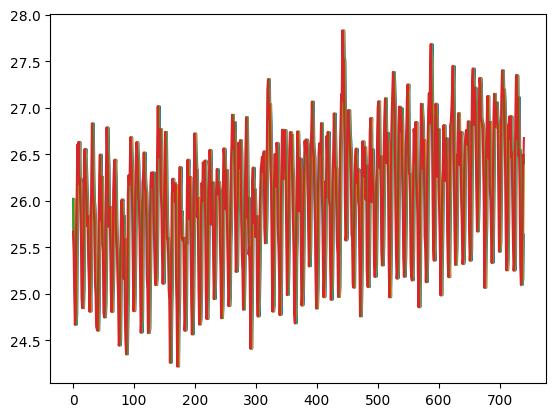

In [6]:
plt.plot(df['temp'])
plt.plot(df['Temp_1'])
plt.plot(df['Temp_2'])
plt.plot(df['Temp_3'])

In [7]:
y = df['Temp_3']
X= df.drop(['Temp_3'], axis=1)

In [8]:
X.shape

(741, 6)

In [9]:
y.shape

(741,)

In [10]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
RobustScaler()
Xtrans = transformer.transform(X)
Xtrans

array([[-0.07997502, -0.75551958, -1.56659995, -0.88533784, -0.45204853,
        -0.05975777],
       [-0.44822512, -0.75432571, -1.56170487, -0.88421679, -0.05906975,
        -0.39809944],
       [-0.05524633, -0.75313185, -1.55680979, -0.88309573, -0.39741142,
        -0.6062003 ],
       ...,
       [-0.93751496,  1.21265347,  0.77823698,  1.15659125, -0.87797812,
        -0.42617501],
       [-0.8741547 ,  1.22114581,  0.78283724,  1.15994467, -0.42548699,
         0.39182356],
       [-0.42166357,  1.22963815,  0.7874375 ,  1.16329808,  0.39251158,
         0.30405396]])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
splits = np.arange(0.5,0.98,0.01)
for split in splits:
    train_size = 1-split
    X_train, X_test, y_train, y_test = train_test_split(Xtrans, y, test_size=train_size, random_state=18)

    rf = RandomForestRegressor(criterion='absolute_error',n_estimators = 300, max_features = 0.6, max_depth = 30,bootstrap=True, random_state = 18).fit(X_train, y_train)
    prediction_train = rf.predict(X_train)
    prediction_test = rf.predict(X_test)
    
    mse = mean_squared_error(y_test, prediction_test)
    rmse = mse**.5
    r = pearsonr(y_test, prediction_test)
    print(r)
    #print(rmse)

PearsonRResult(statistic=0.8808727238131576, pvalue=6.550305292541287e-122)
PearsonRResult(statistic=0.8805039564158528, pvalue=2.09815319301667e-119)
PearsonRResult(statistic=0.885048892634429, pvalue=1.326662366370182e-119)
PearsonRResult(statistic=0.8815919161117693, pvalue=3.5291264491509998e-115)
PearsonRResult(statistic=0.8806001341847289, pvalue=5.454742832239876e-112)
PearsonRResult(statistic=0.8782160716464819, pvalue=2.2220612340650602e-108)
PearsonRResult(statistic=0.8769387377006908, pvalue=1.9171665047275327e-105)
PearsonRResult(statistic=0.8795011912933428, pvalue=3.0057519641647036e-104)
PearsonRResult(statistic=0.880266669427484, pvalue=2.1789156013345565e-102)
PearsonRResult(statistic=0.8821492470924305, pvalue=9.111253419902473e-101)
PearsonRResult(statistic=0.885519582774712, pvalue=3.2210185978203437e-100)
PearsonRResult(statistic=0.8845811660898066, pvalue=4.5237726211486443e-97)
PearsonRResult(statistic=0.8856875868691138, pvalue=2.686021283465703e-95)
PearsonRRes